In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

In [4]:
#Data Loading
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()
df_crypto.shape

(1252, 7)

In [12]:
#Eliminate crypto currencies that don't trade
df_crypto2 = df_crypto[df_crypto.IsTrading == True]
df_crypto2.shape


(1144, 7)

In [17]:
#drop the IsTrading column
df_crypto3 = df_crypto2.drop(columns=["IsTrading"])
df_crypto3.shape


(1144, 6)

In [18]:
#Drop any rows with null values
df_crypto4 = df_crypto3.dropna()
df_crypto4.shape

(685, 6)

In [41]:
#Drop the unneccesary columns
df_crypto4.head()
df_crypto5 = df_crypto4.drop(columns=["CoinName","Unnamed: 0"])
df_crypto5.shape
df_crypto5.TotalCoinSupply = df_crypto5.TotalCoinSupply.astype(float)
df_crypto5.dtypes


Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [43]:
# create dummy variables for categorized columns
df_crypto6 = pd.get_dummies(df_crypto5)
df_crypto6.shape

(685, 109)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=.90)

df_crypto6_scaled = StandardScaler().fit_transform(df_crypto6)

crypto6_pca = pca.fit_transform(df_crypto6_scaled)

df_crypto6_pca = pd.DataFrame(data=crypto6_pca)

df_crypto6_pca


,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.226931,1.233286,-0.494639,-3.074213e-07,1.111361e-10,1.362828e-10,7.070153e-11,2.733220e-11,0.015015,-1.108822,...,7.137502e-13,2.666098e-13,-9.603436e-13,-1.051734e-12,-9.352316e-13,6.989830e-13,5.253028e-13,-1.517264e-13,9.090928e-14,4.786488e-13
1,-0.212511,1.231877,-0.495250,-3.074213e-07,1.111362e-10,1.362830e-10,7.070161e-11,2.733194e-11,0.013635,-1.111887,...,7.085855e-13,2.668530e-13,-9.616340e-13,-1.052818e-12,-9.356647e-13,6.981974e-13,5.262277e-13,-1.512583e-13,9.239834e-14,4.787359e-13
2,-0.156502,0.820326,-0.304937,-2.267268e-07,8.196615e-11,1.005135e-10,5.214347e-11,2.015943e-11,-0.001711,-0.625905,...,1.086144e-14,2.218225e-15,-5.693527e-15,5.016119e-15,-2.141457e-15,-8.739871e-15,7.822825e-15,-1.055206e-14,5.375562e-15,-1.699440e-14
3,0.284201,1.971340,-0.537186,-4.518587e-07,1.633573e-10,2.003217e-10,1.039176e-10,4.018073e-11,-0.030183,-0.827578,...,2.209442e-14,2.231145e-14,2.366920e-14,5.173284e-14,-4.281358e-14,3.538389e-14,4.229595e-15,-5.306076e-14,8.923236e-14,-6.964809e-14
4,-0.208425,-1.471116,0.135380,1.813074e-07,-6.555056e-11,-8.038222e-11,-4.169925e-11,-1.612435e-11,-0.004237,0.064427,...,1.052016e-14,2.581547e-15,-3.894146e-15,8.305541e-15,-4.542721e-15,-6.895659e-15,7.620730e-15,-1.153235e-14,8.215103e-15,-1.764940e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,4.075540,-0.136391,-0.097843,-8.429474e-08,3.046883e-11,3.736366e-11,1.937802e-11,7.504004e-12,-1.094977,0.736512,...,9.148008e-15,1.692661e-15,-1.712052e-15,1.252864e-14,-1.113552e-15,-1.125639e-14,5.669020e-15,-1.294465e-14,6.401820e-15,-2.083926e-14
681,-0.226727,1.233266,-0.494647,-3.074212e-07,1.111362e-10,1.362829e-10,7.070164e-11,2.733205e-11,0.014996,-1.108865,...,7.070927e-13,2.668686e-13,-9.616974e-13,-1.053138e-12,-9.357201e-13,6.984478e-13,5.261288e-13,-1.514311e-13,9.225194e-14,4.785608e-13
682,-0.121196,-2.314110,0.284863,3.476582e-07,-1.256919e-10,-1.541337e-10,-7.995782e-11,-3.091899e-11,-0.001641,-0.011329,...,8.696864e-14,-4.834294e-15,-4.044754e-14,-3.307122e-15,1.075790e-14,-6.067193e-14,3.743597e-14,-4.919458e-14,-2.014012e-14,-8.304000e-14
683,-0.277782,-2.030379,0.262191,3.014883e-07,-1.089994e-10,-1.336618e-10,-6.933954e-11,-2.681192e-11,0.017138,0.161203,...,7.095046e-13,2.746166e-13,-9.679329e-13,-1.041085e-12,-9.423670e-13,7.003672e-13,5.265172e-13,-1.537897e-13,9.364549e-14,4.786320e-13


In [49]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(crypto6_pca)

In [50]:
tsne_features.shape

(685, 2)

In [55]:
tsne_df = pd.DataFrame(tsne_features, columns=['x','y'])
tsne_df

,x,y
0,-1.727164,16.412979
1,0.592340,21.650257
2,-3.068304,-23.802185
3,-14.831528,27.882458
4,-4.553384,-30.643700
...,...,...
680,4.473267,-10.836740
681,4.806945,17.119152
682,33.179016,-0.425352
683,14.125432,-18.037123


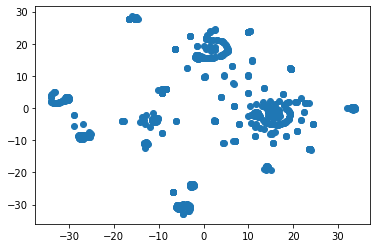

In [56]:
import matplotlib.pyplot as plt
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

C:\Users\GPSchool\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


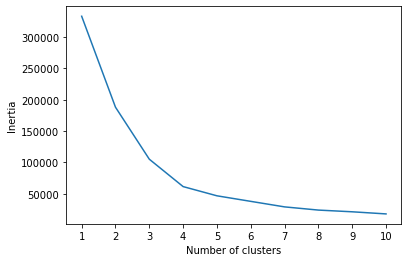

In [57]:
import numpy as np
from sklearn.cluster import KMeans

inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()